In [51]:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re
import plotly.express as px

from dash import Dash, html, dcc
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['stopwords', 'punkt', 'names', 'vader_lexicon'] )
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\juanp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Setup

## Setup API

In [52]:
API_KEY = 'LoiVW76XekU31dGeTzRF3jaRn'
API_KEY_SECRET = 'zMI3E52t5DHPvlBEcq033ZcvzSXwudxOZbgWflDXaNiM29gHXG'
ACCESS_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALiigwEAAAAAQL5JJp3%2BeOebr2JSQERPsx0D6b0%3Di0YCX9UIE8WQRbnyohpKwy9V4k7XCRrXXT3bfqymxQbxPMv7Tb'

In [53]:
auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

## Get Tweets

In [54]:
search_query = "#AppleEvent -filter:retweets"

In [55]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="en",
              since="2022-09-07").items(500)
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 242


## DataFrame

In [56]:
import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

C:\Users\juanp\AppData\Local\Temp\ipykernel_1944\1717546899.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,DropCentr • Video Game Deals • PS5 Xbox Restocks,United States,24/7 Restock Alerts 🚨 #PS5 / #Xbox / #Nintendo...,False,2022-10-17 20:30:04+00:00,🏃‍♂️🏃‍♂️ Airpod Pros $80 off at Target https:/...,[Apple],TweetDeck
1,i-phone care,"Bengaluru South, India",,False,2022-10-17 18:42:56+00:00,MACBOOK A1398 i7. 16gb and 512 gb mint conditi...,"[mobilephonerepair, mobilephotography, mobile]",Twitter for Android
2,i-phone care,"Bengaluru South, India",,False,2022-10-17 18:41:29+00:00,MACBOOK A1398 i7. 16gb and 512 gb mint conditi...,"[mobilephonerepair, mobilephotography, mobile]",Twitter for Android
3,if Apple then 🇺🇦🏳️‍🌈🏳️‍⚧️🤜🏿🤛🏼🦾🇺🇸🏴‍☠️,USA,"An #Apple alumn who loves to speculate, outlan...",False,2022-10-17 16:49:18+00:00,Apple to hold October/November Apple Arcade #A...,"[AppleEvent, AAA]",Twitter for iPhone
4,Goospery,,Goospery,False,2022-10-17 15:32:02+00:00,Experience how your iPhone 14 Pro Max transfor...,"[iPhone14ProMax, DynamicIsland, AppleEvent, ph...",Buffer


In [57]:
tweets_df.shape

(242, 8)

# Analisis Exploratorio (pre-limpieza)

### Cantidad de caracteres en el tweet

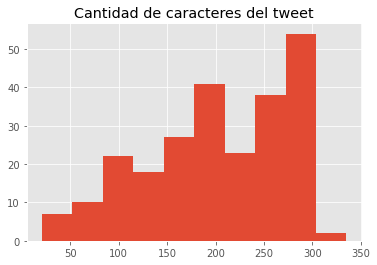

In [58]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Cantidad de palabras en el tweet

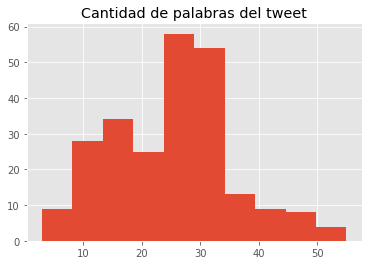

In [59]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio de longitud de las palabras

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='text', ylabel='Density'>

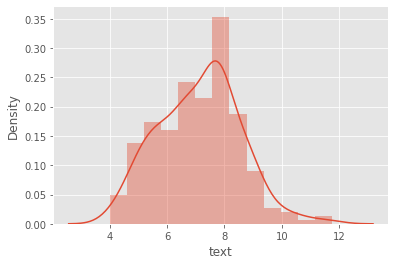

In [60]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

In [61]:
def create_corpus(target):
    corpus=[]
    
    for x in tweets_df['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

### Stopwords

In [62]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

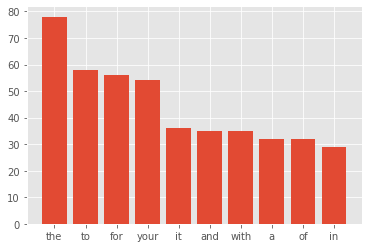

In [63]:
x,y=zip(*top)
plt.bar(x,y)

### Puntuacion

In [64]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

<Figure size 720x360 with 0 Axes>

<BarContainer object of 7 artists>

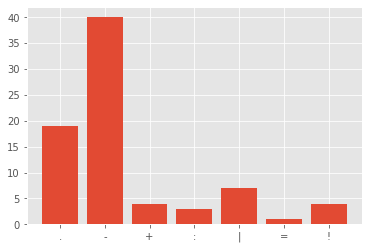

In [65]:
x,y=zip(*dic.items())
plt.bar(x,y)

### Palabras comunes

<AxesSubplot:>

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 128138 (\N{PILL}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 128064 (\N{EYES}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 127819 (\N{LEMON}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128138 (\N{PILL}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128064 (\N{EYES}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127819 (\N{LEMON}) missing from cu

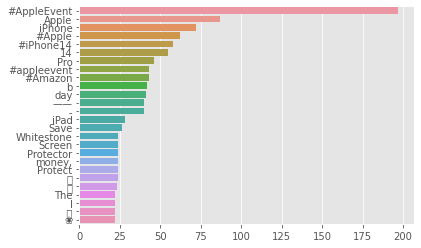

In [66]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [67]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

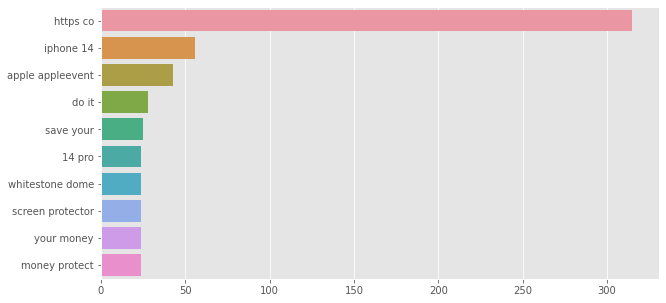

In [68]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### Trigrama

In [69]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

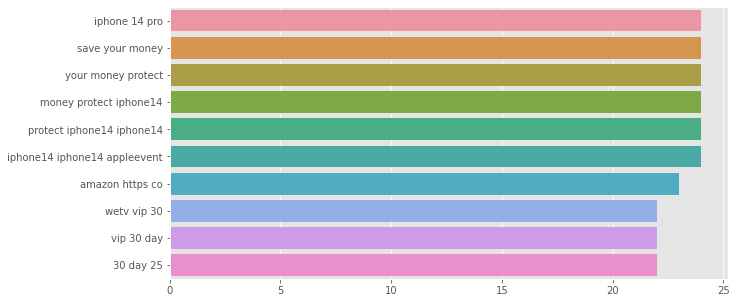

In [70]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

# Limpieza de los datos

### Quitar URLs

In [71]:
def remove_URL(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

In [72]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_URL(x))

### Quitar tags HTML

In [73]:
def remove_HTML(text):
  html = re.compile(r'<.*?>')
  return html.sub(r'', text)

In [74]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_HTML(x))

### Quitar emojis

In [75]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [76]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_emoji(x))

### Quitar puntuacion

In [77]:
def remove_point(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [78]:
tweets_df['text'] = tweets_df['text'].apply(lambda x : remove_point(x))

## Quitar duplicados 

In [79]:
print('len 1', len(tweets_df))
tweets_df.drop_duplicates(subset=['text', 'user_name'], inplace=True)
print('len 2', len(tweets_df))

len 1 242
len 2 197


# Analisis post limpieza

### Caracteres

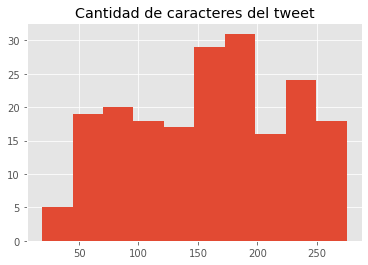

In [80]:
tweet_length = tweets_df['text'].str.len()
plt.hist(tweet_length)
plt.title('Cantidad de caracteres del tweet')
plt.show()

### Palabras

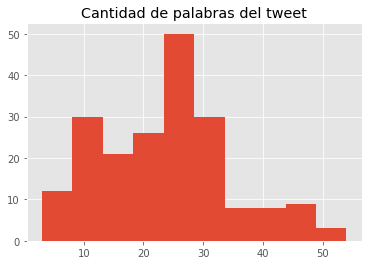

In [81]:
tweet_length = tweets_df['text'].str.split().map(lambda x: len(x))
plt.hist(tweet_length)
plt.title('Cantidad de palabras del tweet')
plt.show()

### Promedio longitud

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='text', ylabel='Density'>

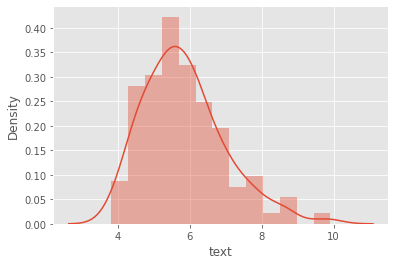

In [82]:
word=tweets_df['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)))

### Palabras comunes

<AxesSubplot:>

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 128138 (\N{PILL}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 128064 (\N{EYES}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 127819 (\N{LEMON}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128138 (\N{PILL}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128064 (\N{EYES}) missing from current font.

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 127819 (\N{LEMON}) missing from cu

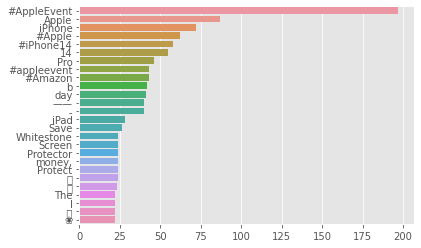

In [83]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

### Analisis ngramas

#### Bigrama

In [84]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

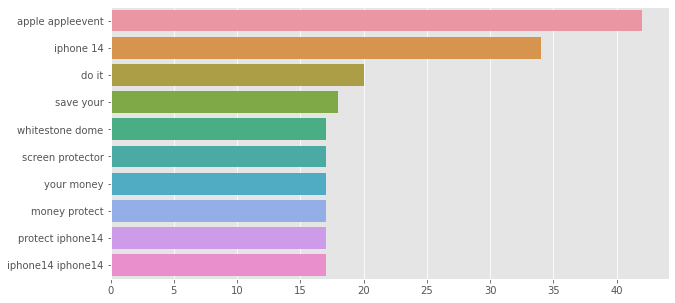

In [85]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

#### Trigrama

In [86]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

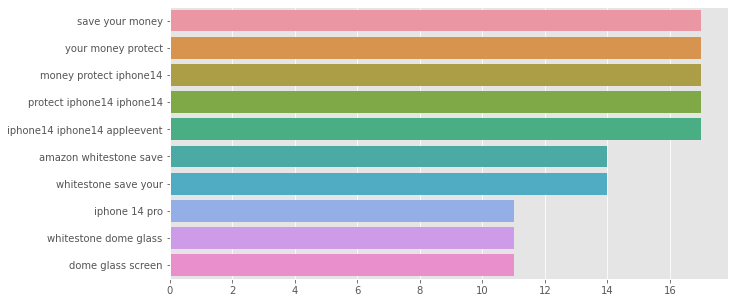

In [87]:
plt.figure(figsize=(10,5))
top_tweet_trigrams=get_top_tweet_trigrams(tweets_df['text'])[:10]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)

## Analisis sentimientos

In [88]:
sia = SentimentIntensityAnalyzer()

### Determinacion de valores de positividad, neutralidad, y negatividad

In [89]:
def getScoreText(text):
    scoreObject = sia.polarity_scores(text)
    score = scoreObject['compound']
    return score

In [90]:
tweets_df['score'] = tweets_df['text'].apply(lambda x : getScoreText(x))

### Determinacion de polaridad de acuerdo a los valores

In [91]:
#rangos de score
def setPolarity(score):
    if score < -0.33:
        return 'negative'
    elif score > 0.33:
        return 'positive'
    else:
        return 'neutral'

In [92]:
tweets_df['polarity'] = tweets_df['score'].apply(lambda x : setPolarity(x))

### Tweets mas positivos y negativos

#### 10 mas negativos

In [93]:
tweets_df.sort_values(by=['score']).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
124,Vj***,India,Ship will be safe @ Harbour!! But that's not t...,False,2022-10-12 15:05:36+00:00,MR L O N E L Y \n\niphone14promax applewatch...,"[iphone14promax, applewatchultra, airpodspro2,...",Instagram,-0.8957,negative
19,H’B 🎙🎶,Nigeria,Life of an entertainer 🥰. H’B,False,2022-10-16 20:45:55+00:00,I wan post one mad art but I know say some peo...,None,Twitter for iPhone,-0.8481,negative
206,Volodymyr 🇺🇦,Україна,Ukrainian designer | 3D Product Visualisation ...,False,2022-10-10 11:28:52+00:00,Theall new iPad 10gen starting at 399\n A15\n ...,None,Twitter Web App,-0.6523,negative
69,Learny Land,Barcelona,Where Curiosity Grows 🚀\nWe develop educationa...,False,2022-10-14 11:55:57+00:00,Looking forward to Halloween \n\nDont wait any...,[Halloween],Twitter Web App,-0.6317,negative
190,Ade-Akanfe 🎤💻📱,"Lagos, Nigeria",Christian || Gospel Entertainment 🎤 || UI Desi...,False,2022-10-10 18:42:58+00:00,Ikeja… Awolowo Way 0500pm\nShot and edited wit...,"[UkraineRussianWar, jendragonisreal, depression]",Twitter for iPhone,-0.5719,negative
204,First India,"Jaipur, India",Welcome to the Official Twitter page of First ...,False,2022-10-10 12:15:40+00:00,Tech giant Apple is likely planning to mark th...,None,Twitter Web App,-0.5267,negative
126,Khankhalil,پاکستان,KP IPR INFLUENCER,False,2022-10-12 14:27:21+00:00,Prices of LNG Sky Rocketing \n\nGovernment Di...,None,Twitter for iPhone,-0.4939,negative
211,Craig,,apple's favorite pasta,False,2022-10-10 07:13:03+00:00,Its unfair we only saw Craig once in an AppleE...,[AppleEvent],Twitter for iPhone,-0.4767,negative
45,Pravin,சிங்கார சென்னை✨,Chasing and searching something to stick into ...,False,2022-10-15 18:50:49+00:00,appltrack markgurman If there is iOS 16 on you...,None,Twitter for iPhone,-0.4449,negative
60,The New Disciple,,I analyze candlestick charts and then devine t...,False,2022-10-14 22:56:49+00:00,Apple chart I have made shows the movement we ...,None,Twitter for Android,-0.4019,negative


#### 10 mas positivos

In [94]:
tweets_df.sort_values(by=['score'], ascending=False).head(10)

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,score,polarity
128,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-12 14:00:42+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
34,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-16 08:00:04+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
134,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-12 11:21:01+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.9317,positive
67,🤎 🦋 HARUTO 🦋 🤎 HELLO 👋 🤙 🌵 👁,,#HARUTO #하루토 #ハルト #温斗\n\nHELLO 👋\n\n#트레저 \n ...,False,2022-10-14 15:09:45+00:00,Apple iPhone 14\n\nHARUTO IM SO HAPPY FOR YOU ...,"[Apple, iPhone14, iPhone14Pro]",Twitter Web App,0.9172,positive
28,Han_globaltrade,United States,Software and Electronic Products. 💻👍\nAmazon A...,False,2022-10-16 11:09:33+00:00,Happy Sunday Apple 20W USBC type C that is wal...,None,Twitter Web App,0.9022,positive
214,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-10 05:11:00+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.8934,positive
44,Whitestone_EU,,Best Device Protectors\nDome Glass/ EZ Glass/ ...,False,2022-10-15 18:56:01+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.8934,positive
20,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-16 20:44:00+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.8934,positive
6,WhitestoneDome Deutschland,"Berlin, Germany",Full protection You can't see \nhttps://t.co/K...,False,2022-10-17 13:21:00+00:00,The best Apple iPhone 14 screen protectors di...,None,Buffer,0.8934,positive
139,Lynne K Lynch,Dayton OhioUSA #DaytonStrong,"Be positive\nstay kind,always smile even if sa...",False,2022-10-12 07:08:28+00:00,AmanAdwin Lovely photo of U \n2Yepits that tim...,[photo],Twitter for Android,0.8689,positive


#### Conteo de tweets en general

In [95]:
tweets_df['score'].value_counts().sort_index()

-0.8957    1
-0.8481    1
-0.6523    1
-0.6317    1
-0.5719    1
          ..
 0.8689    1
 0.8934    4
 0.9022    1
 0.9172    1
 0.9317    3
Name: score, Length: 64, dtype: int64

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='score', ylabel='Density'>

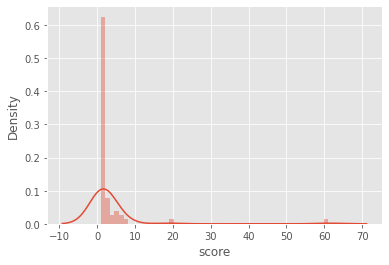

In [96]:
scores=tweets_df['score'].value_counts().sort_index()
sns.distplot(scores)

In [97]:
tweets_df['polarity'].value_counts()

neutral     110
positive     70
negative     17
Name: polarity, dtype: int64

### Conclusiones

El algoritmo toma como negativo el uso de palabras negativas sin tomar en cuenta el contexto. (e.g. ID 166 Tabla de Negativos)
El algoritmo no reconoce el uso del sarcasmo en algunos de los tweets. (e.g. ID 405 Tabla de Negativos)
Los comentarios positivos tienen un mejor resultado con el analisis de sentimientos.
Los comentarios positivos tienen mayor volumen ya que existen bots que repiten el mismo tweet etiquetando a distintas personas en cada tweet.

# Dashboard

In [98]:
import plotly.express as px
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

In [99]:

"""
The following information was gathered from streamcharts.com
"""
reveals = pd.DataFrame({
  "event": ["iPhone 14 reveal", "iPhone 12 reveal", "iPhone 13 reveal", "iPad Air reveal", "24-inch iMacs introduction", "New Mac generation", "M1 Ultra reveal", "New MacBook Pro generation"],
  "event_views": [3690000, 2740000, 2270000, 1500000, 943000, 891300, 740500, 731800]
})
product_popularity = pd.DataFrame({
  "product": ["iPhone 14", "AirPods Pro", "Apple Watch Ultra", "iPhone 14 Pro", "Apple Watch SE", "Apple Watch Series 8"],
  "product_views": [3690000, 3040000, 2790000, 2770000, 2490000, 2460000]
})
app = JupyterDash(__name__)

revealed_popularity = px.bar(reveals, x="event", y="event_views", title="Apple product reveals vs. popularity")
product_popularity = px.bar(product_popularity, x="product", y="product_views", title="Apple product popularity")
pie = px.pie(tweets_df, values='score', names='polarity', title='Sentiment Analysis')

app.layout = html.Div([
    html.H1("Apple Events September 2022"),
    dcc.Graph(figure=revealed_popularity),
    html.Label([
        "colorscale",
    ]),
])
app.run_server(mode='inline')